### Deliverable 1: Preprocessing the Data for a Neural Network

In [6]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from pathlib import Path

#  Import and read the charity_data.csv.

# Loading data USING CSV that contains cleanded values for MaritalStatus and Gender 
file_path = Path("../Resources/TravelCleanedSkiLearnImputer.csv")
vacay_df = pd.read_csv(file_path)
vacay_df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Single,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Single,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Single,1.0,0,5,1,0.0,Executive,18468.0


In [7]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
vacay_df = vacay_df.drop(["CustomerID", "ProdTaken","Occupation","Designation" ],axis = 1)
vacay_df.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,41.000000,Self Enquiry,3,6.0,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,20993.0
1,49.000000,Company Invited,1,14.0,Male,3,4.0,Deluxe,4.0,Single,2.0,0,3,1,2.0,20130.0
2,37.000000,Self Enquiry,1,8.0,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,17090.0
3,33.000000,Company Invited,1,9.0,Female,2,3.0,Basic,3.0,Single,2.0,1,5,1,1.0,17909.0
4,37.622265,Self Enquiry,1,8.0,Male,2,3.0,Basic,4.0,Single,1.0,0,5,1,0.0,18468.0


In [8]:
# Determine the number of unique values in each column.
vacay_df.nunique()

Age                           45
TypeofContact                  2
CityTier                       3
DurationOfPitch               35
Gender                         2
NumberOfPersonVisiting         5
NumberOfFollowups              7
ProductPitched                 5
PreferredPropertyStar          4
MaritalStatus                  2
NumberOfTrips                 13
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       5
MonthlyIncome               2476
dtype: int64

In [9]:
# Look at APPLICATION_TYPE value counts for binning
vacay_type = vacay_df.Age.value_counts()
vacay_type

35.000000    237
36.000000    231
37.622265    226
34.000000    211
31.000000    203
30.000000    199
32.000000    197
33.000000    189
37.000000    185
29.000000    178
38.000000    176
41.000000    155
39.000000    150
28.000000    147
40.000000    146
42.000000    142
27.000000    138
43.000000    130
46.000000    121
45.000000    116
26.000000    106
44.000000    105
51.000000     90
47.000000     88
50.000000     86
25.000000     74
52.000000     68
53.000000     66
49.000000     65
48.000000     65
55.000000     64
54.000000     61
56.000000     58
24.000000     56
23.000000     46
22.000000     46
59.000000     44
21.000000     41
20.000000     38
19.000000     32
58.000000     31
57.000000     29
60.000000     29
18.000000     14
61.000000      9
Name: Age, dtype: int64

<AxesSubplot:ylabel='Density'>

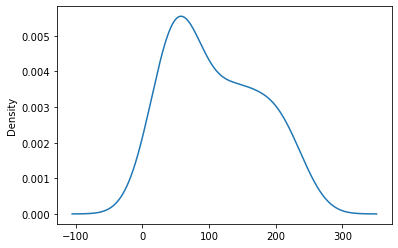

In [10]:
# Visualize the value counts of APPLICATION_TYPE
vacay_type.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type[application_type<500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df.CLASSIFICATION.value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

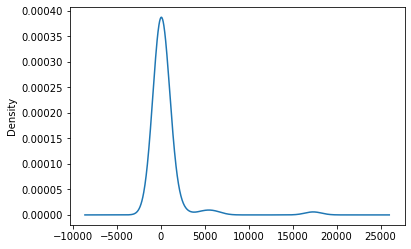

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_count.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_count[classification_count<1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\cthompson\AppData\Local\Continuum\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=78)

C:\Users\cthompson\AppData\Local\Continuum\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq = 'epoch',
    period = 5)

In [18]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50,callbacks= [cp_callback])

Epoch 1/50
804/804 [==============================] - 1s 754us/step - loss: 0.5687 - accuracy: 0.7230
Epoch 2/50
804/804 [==============================] - 1s 970us/step - loss: 0.5548 - accuracy: 0.7305
Epoch 3/50
804/804 [==============================] - 1s 953us/step - loss: 0.5512 - accuracy: 0.7319
Epoch 4/50
804/804 [==============================] - 1s 941us/step - loss: 0.5506 - accuracy: 0.7323
Epoch 5/50
791/804 [============================>.] - ETA: 0s - loss: 0.5492 - accuracy: 0.7328
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 980us/step - loss: 0.5495 - accuracy: 0.7324
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5476 - accuracy: 0.7340
Epoch 7/50
804/804 [==============================] - 1s 932us/step - loss: 0.5475 - accuracy: 0.7331
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5473 - accuracy: 0.7349
Epoch 9/50
804/804 [==============================

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5523 - accuracy: 0.7277 - 303ms/epoch - 1ms/step
Loss: 0.5522516965866089, Accuracy: 0.7276967763900757


In [20]:
#Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")